In [2]:
import sys
sys.path.append('../')
sys.path.append('../src')
import src.visualization.EDA_Trento as EDA
import src.visualization.mappe as maps


/home/gianmarco/anaconda3/envs/DS_2022/lib/python3.8/site-packages/pyproj/crs/crs.py:53: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  return _prepare_from_string(" ".join(pjargs))
/media/gianmarco/Users/HOME/Desktop/università/Machine Learning/DataScience/notebooks/../src/trentodatalib/meteo.py:61: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_tmp_tomerge['date'] =df_tmp_tomerge['datetime'].dt.date
/media/gianmarco/Users/HOME/Desktop/università/Machine Learning/DataScience/notebooks/../src/trentodatalib/meteo.py:63: SettingWi

In [1]:
EDA.histplotconsumi()

NameError: name 'EDA' is not defined

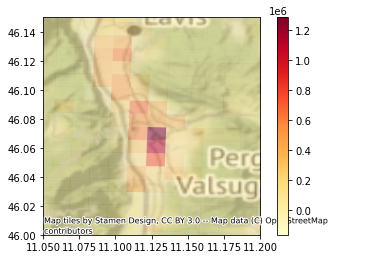

In [5]:
maps.plot_mappa_consumi_lordi()

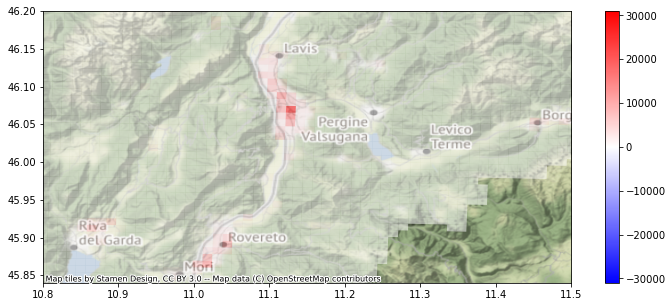

In [3]:
maps.plot_mappa_diff_giorno_notte()

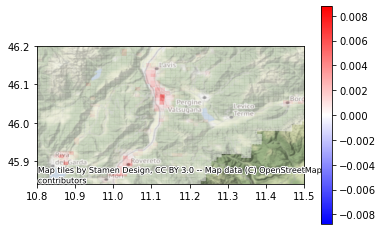

In [2]:
maps.plot_mappa_diff_wknd()

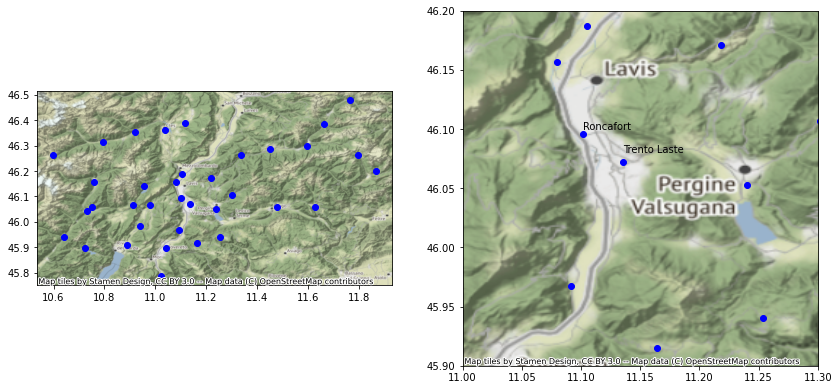

In [3]:
maps.plot_mappa_stazioni()